In [1]:
# import dependencies
import pandas as pd
import json
import matplotlib.pyplot as plt
import csv, os
from collections import namedtuple

import requests
import json
from pprint import pprint

# Google YouTube API Key
#from config import YTkey

#from scipy.stats import linregress
import scipy.stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Output File (CSV)
output_data_file = "../output_data/US_youtube_trending_video_data.csv"

# %matplotlib notebook
#pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib


In [2]:
#Read CSV
#Youtube_Data = pd.read_csv('output_data/US_youtube_trending_data_cleaned.csv')
Youtube_Data = pd.read_csv('../output_data/US_youtube_trending_video_data.csv')

# Convert CSV to Data Frame
Youtube_Data = pd.DataFrame(Youtube_Data)

# preview Data Frame
Youtube_Data.head()

,Unnamed: 0,Video ID,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,view_count,Likes,Dislikes,count_max_view,Year,Month
0,172,cAtazIk1IYw,How To Make a Curried Egg Sandwich,2020-08-07 18:30:06+00:00,UCR4s1DE9J4DHzZYXMltSMAg,HowToBasic,26,2020-08-12 00:00:00+00:00,1238677,104736,3736,1238677,2020,8
1,173,NYFHnIiA8gE,Cake Rescue Fixing Viral Cake Fails | How To C...,2020-08-07 09:30:04+00:00,UCsP7Bpw36J666Fct5M8u-ZA,How To Cook That,24,2020-08-12 00:00:00+00:00,938198,44088,565,938198,2020,8
2,174,czwejgoH3zs,"Son, lemme teach you something new",2020-08-06 19:47:12+00:00,UCw03U5DZGLqvv5elJvXvR0Q,Bread Boys,24,2020-08-12 00:00:00+00:00,1722152,169501,927,1722152,2020,8
3,175,dO6YihaqtaQ,Trump takes executive action to address econom...,2020-08-09 01:35:42+00:00,UCBi2mrWuNuyYy4gbM6fU18Q,ABC News,25,2020-08-12 00:00:00+00:00,1090847,10922,2517,1090847,2020,8
4,176,sSjtGqRXQ9Y,JUDAS AND THE BLACK MESSIAH - Official Trailer,2020-08-06 23:01:42+00:00,UCjmJDM5pRKbUlVIzDYYWb6g,Warner Bros. Pictures,24,2020-08-12 00:00:00+00:00,971704,23311,1987,971704,2020,8


In [3]:
Youtube_Data.columns

Index(['Unnamed: 0', 'Video ID', 'title', 'publishedAt', 'Channel ID',
       'Channel Title', 'categoryId', 'trending_date', 'view_count', 'Likes',
       'Dislikes', 'count_max_view', 'Year', 'Month'],
      dtype='object')

In [4]:
# Observe Data Types
Youtube_Data.dtypes

Unnamed: 0         int64
Video ID          object
title             object
publishedAt       object
Channel ID        object
Channel Title     object
categoryId         int64
trending_date     object
view_count         int64
Likes              int64
Dislikes           int64
count_max_view     int64
Year               int64
Month              int64
dtype: object

In [5]:
# Number of Records in data
len(Youtube_Data)

26062

In [6]:
print ("Rows     : " , Youtube_Data.shape[0]) #Displays numbers of rows .
print ("Columns  : " , Youtube_Data.shape[1]) # and column our dataset contains.
print ("\nFeatures : \n", Youtube_Data.columns.tolist())#displays column names
print ("\nMissing values :  ", Youtube_Data.isnull().sum().values.sum())   #find missing values
print ("\nUnique values :  \n", Youtube_Data.nunique())  # Count distinct observations

Rows     :  26062
Columns  :  14

Features : 
 ['Unnamed: 0', 'Video ID', 'title', 'publishedAt', 'Channel ID', 'Channel Title', 'categoryId', 'trending_date', 'view_count', 'Likes', 'Dislikes', 'count_max_view', 'Year', 'Month']

Missing values :   0

Unique values :  
 Unnamed: 0        26062
Video ID          25976
title             25849
publishedAt       25593
Channel ID         6037
Channel Title      6131
categoryId           15
trending_date       697
view_count        25861
Likes             23875
Dislikes           5590
count_max_view    25861
Year                  3
Month                12
dtype: int64


In [7]:
# finding number of null records for each column
Youtube_Data.isna().sum()

Unnamed: 0        0
Video ID          0
title             0
publishedAt       0
Channel ID        0
Channel Title     0
categoryId        0
trending_date     0
view_count        0
Likes             0
Dislikes          0
count_max_view    0
Year              0
Month             0
dtype: int64

In [8]:
# Dropping unecessary columns
#Youtube_Data = Youtube_Data.drop(columns=['tags','comment_count','thumbnail_link','comments_disabled','ratings_disabled','description'])

In [9]:
# Renaming columns
Youtube_Data = Youtube_Data.rename(columns={'likes':'Likes','dislikes':'Dislikes',
                                            'channelTitle':'Channel Title','channelTitle':'Channel Title',
                                           'video_id':'Video ID','channelId':'Channel ID'})

In [10]:
Youtube_Data.head()

,Unnamed: 0,Video ID,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,view_count,Likes,Dislikes,count_max_view,Year,Month
0,172,cAtazIk1IYw,How To Make a Curried Egg Sandwich,2020-08-07 18:30:06+00:00,UCR4s1DE9J4DHzZYXMltSMAg,HowToBasic,26,2020-08-12 00:00:00+00:00,1238677,104736,3736,1238677,2020,8
1,173,NYFHnIiA8gE,Cake Rescue Fixing Viral Cake Fails | How To C...,2020-08-07 09:30:04+00:00,UCsP7Bpw36J666Fct5M8u-ZA,How To Cook That,24,2020-08-12 00:00:00+00:00,938198,44088,565,938198,2020,8
2,174,czwejgoH3zs,"Son, lemme teach you something new",2020-08-06 19:47:12+00:00,UCw03U5DZGLqvv5elJvXvR0Q,Bread Boys,24,2020-08-12 00:00:00+00:00,1722152,169501,927,1722152,2020,8
3,175,dO6YihaqtaQ,Trump takes executive action to address econom...,2020-08-09 01:35:42+00:00,UCBi2mrWuNuyYy4gbM6fU18Q,ABC News,25,2020-08-12 00:00:00+00:00,1090847,10922,2517,1090847,2020,8
4,176,sSjtGqRXQ9Y,JUDAS AND THE BLACK MESSIAH - Official Trailer,2020-08-06 23:01:42+00:00,UCjmJDM5pRKbUlVIzDYYWb6g,Warner Bros. Pictures,24,2020-08-12 00:00:00+00:00,971704,23311,1987,971704,2020,8


In [11]:
# add new column that would contain latest view_count for the particular video.
#since number of views keep on increasing everyday , we will be using only single observation against a video id.
Youtube_Data['count_max_view'] = Youtube_Data.groupby(['Video ID'])['view_count'].transform(max)

In [12]:
# Renaming Data Frame 
Youtube_Unique_Video_Id = Youtube_Data

In [13]:
#changing published date , trending_date to datetime datatype.
Youtube_Unique_Video_Id.publishedAt= pd.to_datetime(Youtube_Unique_Video_Id.publishedAt)
Youtube_Unique_Video_Id.trending_date= pd.to_datetime(Youtube_Unique_Video_Id.trending_date)

In [14]:
#Adding column for year and month to the dataframe
Youtube_Unique_Video_Id['Year']=Youtube_Unique_Video_Id['publishedAt'].dt.year
Youtube_Unique_Video_Id['Month']=Youtube_Unique_Video_Id.publishedAt.dt.month
Youtube_Unique_Video_Id['MonYear']=Youtube_Unique_Video_Id['Month'].astype(str)+ Youtube_Unique_Video_Id['Year'].astype(str)

In [15]:
Youtube_Unique_Video_Id.head(10)


,Unnamed: 0,Video ID,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,view_count,Likes,Dislikes,count_max_view,Year,Month,MonYear
0,172,cAtazIk1IYw,How To Make a Curried Egg Sandwich,2020-08-07 18:30:06+00:00,UCR4s1DE9J4DHzZYXMltSMAg,HowToBasic,26,2020-08-12 00:00:00+00:00,1238677,104736,3736,1238677,2020,8,82020
1,173,NYFHnIiA8gE,Cake Rescue Fixing Viral Cake Fails | How To C...,2020-08-07 09:30:04+00:00,UCsP7Bpw36J666Fct5M8u-ZA,How To Cook That,24,2020-08-12 00:00:00+00:00,938198,44088,565,938198,2020,8,82020
2,174,czwejgoH3zs,"Son, lemme teach you something new",2020-08-06 19:47:12+00:00,UCw03U5DZGLqvv5elJvXvR0Q,Bread Boys,24,2020-08-12 00:00:00+00:00,1722152,169501,927,1722152,2020,8,82020
3,175,dO6YihaqtaQ,Trump takes executive action to address econom...,2020-08-09 01:35:42+00:00,UCBi2mrWuNuyYy4gbM6fU18Q,ABC News,25,2020-08-12 00:00:00+00:00,1090847,10922,2517,1090847,2020,8,82020
4,176,sSjtGqRXQ9Y,JUDAS AND THE BLACK MESSIAH - Official Trailer,2020-08-06 23:01:42+00:00,UCjmJDM5pRKbUlVIzDYYWb6g,Warner Bros. Pictures,24,2020-08-12 00:00:00+00:00,971704,23311,1987,971704,2020,8,82020
5,177,kcynVTnaHw0,Juventus vs. Lyon | CHAMPIONS LEAGUE Round of ...,2020-08-07 21:25:58+00:00,UCET00YnetHT7tOpu12v8jxg,Champions League on CBS Sports,17,2020-08-12 00:00:00+00:00,764778,6771,292,764778,2020,8,82020
6,178,HM_fkwDB-Xg,Yashahime: Princess Half-Demon | Official Anno...,2020-08-07 03:00:02+00:00,UCV1da9peoqEwqr45bpTJsbQ,vizmedia,1,2020-08-12 00:00:00+00:00,740830,34199,280,740830,2020,8,82020
7,179,9wjvPD4-RyE,Russ - Why (Official Video),2020-08-07 05:24:50+00:00,UCiIETTq2It3OzW8_WYRPTyQ,Russ,10,2020-08-12 00:00:00+00:00,761871,52139,910,761871,2020,8,82020
8,180,FnSr820S2Mk,Explained: What happened in deadly Beirut expl...,2020-08-05 21:01:33+00:00,UCoMdktPbSTixAyNGwb-UYkQ,Sky News,25,2020-08-12 00:00:00+00:00,8496552,74508,3034,8496552,2020,8,82020
9,181,Uxf0f27n-m4,Forgive Me - Live - Chloe x Halle,2020-08-07 01:45:25+00:00,UCKvu7JgqK7-ZKUKHC33meEw,Chloe x Halle,24,2020-08-12 00:00:00+00:00,776252,91286,674,776252,2020,8,82020


In [16]:
# make a new dataframe with only single observations for each id.
Youtube_Unique_Video_Id = Youtube_Data.loc[Youtube_Data.view_count == Youtube_Data.count_max_view]
# Youtube_Unique_Video_Id.loc[Youtube_Unique_Video_Id.Year == 2021, 'title'].count()

In [17]:
# Use Youtube_Unique_Video_Id for main dataset

#Youtube_Unique_Video_Id.to_csv(output_data_file)
Youtube_Unique_Video_Id.count()

Unnamed: 0        26062
Video ID          26062
title             26062
publishedAt       26062
Channel ID        26062
Channel Title     26062
categoryId        26062
trending_date     26062
view_count        26062
Likes             26062
Dislikes          26062
count_max_view    26062
Year              26062
Month             26062
MonYear           26062
dtype: int64

In [18]:
# Number of unique records in each column
Youtube_Unique_Video_Id.nunique()

Unnamed: 0        26062
Video ID          25976
title             25849
publishedAt       25593
Channel ID         6037
Channel Title      6131
categoryId           15
trending_date       697
view_count        25861
Likes             23875
Dislikes           5590
count_max_view    25861
Year                  3
Month                12
MonYear              24
dtype: int64

In [19]:
Youtube_Unique_Video_Id.duplicated(subset=['Video ID'])

0        False
1        False
2        False
3        False
4        False
         ...  
26057    False
26058    False
26059    False
26060    False
26061    False
Length: 26062, dtype: bool

In [20]:
Reocurring_Trending_Videos = Youtube_Unique_Video_Id.groupby(['Video ID']).count().sort_values(by='title',ascending=False)
Reocurring_Trending_Videos.head(10)

,Unnamed: 0,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,view_count,Likes,Dislikes,count_max_view,Year,Month,MonYear
Video ID,,,,,,,,,,,,,,
69KrkMpvZdg,8,8,8,8,8,8,8,8,8,8,8,8,8,8
AWXvClaRtsI,7,7,7,7,7,7,7,7,7,7,7,7,7,7
hAxqygRdM4g,7,7,7,7,7,7,7,7,7,7,7,7,7,7
ZoPJVcHYlU0,6,6,6,6,6,6,6,6,6,6,6,6,6,6
BxOEj8ZeX2g,5,5,5,5,5,5,5,5,5,5,5,5,5,5
ifJYb2An7wE,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Isim0ysZ6X4,5,5,5,5,5,5,5,5,5,5,5,5,5,5
kmk5vciFbek,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Hb3rmh-_FMw,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [21]:
Youtube_Unique_Video_Id.loc[Youtube_Unique_Video_Id['Video ID'] == '69KrkMpvZdg']

,Unnamed: 0,Video ID,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,view_count,Likes,Dislikes,count_max_view,Year,Month,MonYear
8349,49396,69KrkMpvZdg,Celebrating Luther Vandross's 70th Birthday,2021-04-19 15:00:08+00:00,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2021-04-20 00:00:00+00:00,0,0,0,0,2021,4,42021
8388,49597,69KrkMpvZdg,Celebrating Luther Vandross's 70th Birthday,2021-04-19 15:00:08+00:00,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2021-04-21 00:00:00+00:00,0,0,0,0,2021,4,42021
8420,49810,69KrkMpvZdg,Celebrating Luther Vandross's 70th Birthday,2021-04-19 15:00:08+00:00,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2021-04-22 00:00:00+00:00,0,0,0,0,2021,4,42021
8451,50050,69KrkMpvZdg,Celebrating Luther Vandross's 70th Birthday,2021-04-19 15:00:08+00:00,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2021-04-23 00:00:00+00:00,0,0,0,0,2021,4,42021
8486,50283,69KrkMpvZdg,Celebrating Luther Vandross's 70th Birthday,2021-04-19 15:00:08+00:00,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2021-04-24 00:00:00+00:00,0,0,0,0,2021,4,42021
8507,50504,69KrkMpvZdg,Celebrating Luther Vandross's 70th Birthday,2021-04-19 15:00:08+00:00,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2021-04-25 00:00:00+00:00,0,0,0,0,2021,4,42021
8540,50735,69KrkMpvZdg,Celebrating Luther Vandross's 70th Birthday,2021-04-19 15:00:08+00:00,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2021-04-26 00:00:00+00:00,0,0,0,0,2021,4,42021
8586,50969,69KrkMpvZdg,Celebrating Luther Vandross's 70th Birthday,2021-04-19 15:00:08+00:00,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2021-04-27 00:00:00+00:00,0,0,0,0,2021,4,42021


In [22]:
# display data frame first five rows
Youtube_Unique_Video_Id.head()

,Unnamed: 0,Video ID,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,view_count,Likes,Dislikes,count_max_view,Year,Month,MonYear
0,172,cAtazIk1IYw,How To Make a Curried Egg Sandwich,2020-08-07 18:30:06+00:00,UCR4s1DE9J4DHzZYXMltSMAg,HowToBasic,26,2020-08-12 00:00:00+00:00,1238677,104736,3736,1238677,2020,8,82020
1,173,NYFHnIiA8gE,Cake Rescue Fixing Viral Cake Fails | How To C...,2020-08-07 09:30:04+00:00,UCsP7Bpw36J666Fct5M8u-ZA,How To Cook That,24,2020-08-12 00:00:00+00:00,938198,44088,565,938198,2020,8,82020
2,174,czwejgoH3zs,"Son, lemme teach you something new",2020-08-06 19:47:12+00:00,UCw03U5DZGLqvv5elJvXvR0Q,Bread Boys,24,2020-08-12 00:00:00+00:00,1722152,169501,927,1722152,2020,8,82020
3,175,dO6YihaqtaQ,Trump takes executive action to address econom...,2020-08-09 01:35:42+00:00,UCBi2mrWuNuyYy4gbM6fU18Q,ABC News,25,2020-08-12 00:00:00+00:00,1090847,10922,2517,1090847,2020,8,82020
4,176,sSjtGqRXQ9Y,JUDAS AND THE BLACK MESSIAH - Official Trailer,2020-08-06 23:01:42+00:00,UCjmJDM5pRKbUlVIzDYYWb6g,Warner Bros. Pictures,24,2020-08-12 00:00:00+00:00,971704,23311,1987,971704,2020,8,82020


In [23]:
# Basic Statistics for Data Frame
Youtube_Unique_Video_Id.describe().applymap('{:,.2f}'.format)

,Unnamed: 0,categoryId,view_count,Likes,Dislikes,count_max_view,Year,Month
count,"26,062.00","26,062.00","26,062.00","26,062.00","26,062.00","26,062.00","26,062.00","26,062.00"
mean,"74,551.79",18.85,"2,773,034.69","138,254.86","2,136.48","2,773,034.69","2,021.10",6.58
std,"42,078.55",6.72,"6,780,496.24","394,301.76","11,102.08","6,780,496.24",0.70,3.44
min,172.00,1.00,0.00,0.00,0.00,0.00,"2,020.00",1.00
25%,"37,947.25",17.00,"573,068.25","20,399.00",0.00,"573,068.25","2,021.00",4.00
50%,"78,376.50",20.00,"1,174,506.00","49,130.50",395.00,"1,174,506.00","2,021.00",7.00
75%,"109,988.75",24.00,"2,574,854.00","124,142.00","1,389.00","2,574,854.00","2,022.00",10.00
max,"143,389.00",29.00,"264,407,389.00","16,021,534.00","879,354.00","264,407,389.00","2,022.00",12.00


In [24]:
#Getting category for the category file
#we need id and title from this file which are under items tag and snippet contain title
with open("../US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
category=[]
for cat in categories:
    category.append([cat["id"],cat["snippet"]["title"]])

In [25]:
df_category = pd.DataFrame(category,columns=['categoryId','category']) 
df_category.head(20)

,categoryId,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [26]:
df_category.categoryId=df_category.categoryId.astype('int64')
#merge YT Data Frame and df_category to get category names
df_merge = Youtube_Unique_Video_Id.merge(df_category, on = 'categoryId', how = 'inner')
df_merge.head()

,Unnamed: 0,Video ID,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,view_count,Likes,Dislikes,count_max_view,Year,Month,MonYear,category
0,172,cAtazIk1IYw,How To Make a Curried Egg Sandwich,2020-08-07 18:30:06+00:00,UCR4s1DE9J4DHzZYXMltSMAg,HowToBasic,26,2020-08-12 00:00:00+00:00,1238677,104736,3736,1238677,2020,8,82020,Howto & Style
1,580,8r1D-vNUWsg,☁️ 🍞 CLOUD BREAD,2020-08-09 00:00:04+00:00,UCzqbfYjQmf9nLQPMxVgPhiA,emmymadeinjapan,26,2020-08-14 00:00:00+00:00,993107,41182,650,993107,2020,8,82020,Howto & Style
2,593,XlOLx3fyf10,TESTING TIKTOK ART TUTORIALS,2020-08-08 20:00:03+00:00,UCD4XIm3ZFhT72WjqhIXMN9w,LavenderTowne,26,2020-08-14 00:00:00+00:00,407183,42644,347,407183,2020,8,82020,Howto & Style
3,759,KnE6u4hFx14,PAINTING OUR FACES ON BRENT'S NEW HOUSE! (REVE...,2020-08-08 20:45:05+00:00,UCPpATKqmMV-CNRNWYaDUwiA,Alexa Rivera,26,2020-08-15 00:00:00+00:00,4782509,207021,3637,4782509,2020,8,82020,Howto & Style
4,798,YwJyis4yOEA,ANSWERING YOUR ASSUMPTIONS ABOUT US 😭,2020-08-09 13:46:28+00:00,UC21yq4sq8uxTcfgIxxyE9VQ,Carli Bybel,26,2020-08-15 00:00:00+00:00,350066,20393,379,350066,2020,8,82020,Howto & Style


In [28]:
df_merge.groupby(df_merge['category']).size().sort_values(ascending=False).head(3)

category
Entertainment    5165
Gaming           4959
Music            4219
dtype: int64

In [29]:
# creating dataframe with top_3_categories

Top_3_category_list = ['Entertainment','Gaming','Music']
All_rows_for_top_3_category = df_merge["category"].isin(Top_3_category_list)
All_rows_for_top_3_category_data = df_merge[All_rows_for_top_3_category]
All_rows_for_top_3_category_data.to_csv("../output_data/Top_3_category_data.csv")
All_rows_for_top_3_category_data.fillna(0)
len(All_rows_for_top_3_category_data)


14343

In [32]:
# Create data series of Video Counts by Category using conditionals

augTT = All_rows_for_top_3_category_data[All_rows_for_top_3_category_data["MonYear"]=="82020"]
sepTT = All_rows_for_top_3_category_data[All_rows_for_top_3_category_data["MonYear"]=="92020"]
octTT = All_rows_for_top_3_category_data[All_rows_for_top_3_category_data["MonYear"]=="102020"]
novTT = All_rows_for_top_3_category_data[All_rows_for_top_3_category_data["MonYear"]=="112020"]
decTT = All_rows_for_top_3_category_data[All_rows_for_top_3_category_data["MonYear"]=="122020"]
janTO = All_rows_for_top_3_category_data[All_rows_for_top_3_category_data["MonYear"]=="12021"]
febTO = All_rows_for_top_3_category_data[All_rows_for_top_3_category_data["MonYear"]=="22021"]
marTO = All_rows_for_top_3_category_data[All_rows_for_top_3_category_data["MonYear"]=="32021"]
aprTO = All_rows_for_top_3_category_data[All_rows_for_top_3_category_data["MonYear"]=="42021"]
mayTO = All_rows_for_top_3_category_data[All_rows_for_top_3_category_data["MonYear"]=="52021"]
junTO = All_rows_for_top_3_category_data[All_rows_for_top_3_category_data["MonYear"]=="62021"]
julTO = All_rows_for_top_3_category_data[All_rows_for_top_3_category_data["MonYear"]=="72021"]
augTO = All_rows_for_top_3_category_data[All_rows_for_top_3_category_data["MonYear"]=="82021"]


#Group by Category
augTTVideoCount = augTT.groupby(["category"]).count()["Video ID"]
sepTTVideoCount = sepTT.groupby(["category"]).count()["Video ID"]
octTTVideoCount = octTT.groupby(["category"]).count()["Video ID"]
novTTVideoCount = novTT.groupby(["category"]).count()["Video ID"]
decTTVideoCount = decTT.groupby(["category"]).count()["Video ID"]
janTOVideoCount = janTO.groupby(["category"]).count()["Video ID"]
febTOVideoCount = febTO.groupby(["category"]).count()["Video ID"]
marTOVideoCount = marTO.groupby(["category"]).count()["Video ID"]
aprTOVideoCount = aprTO.groupby(["category"]).count()["Video ID"]
mayTOVideoCount = mayTO.groupby(["category"]).count()["Video ID"]
junTOVideoCount = junTO.groupby(["category"]).count()["Video ID"]
julTOVideoCount = julTO.groupby(["category"]).count()["Video ID"]
augTOVideoCount = augTO.groupby(["category"]).count()["Video ID"]

# Combine series into single DataFrame
videoCountbyMon = pd.DataFrame({
    "Aug 20" : augTTVideoCount,
    "Sep 20" : sepTTVideoCount,
    "Oct 20" : octTTVideoCount,
    "Nov 20" : novTTVideoCount,
    "Dec 20" : decTTVideoCount,
    "Jan 21" : janTOVideoCount,
    "Feb 21" : febTOVideoCount,
    "Mar 21" : marTOVideoCount,
    "Apr 21" : aprTOVideoCount,
    "May 21" : mayTOVideoCount,
    "Jun 21" : junTOVideoCount,
    "Jul 21" : julTOVideoCount,
    "Aug 21" : augTOVideoCount,
})



In [33]:
#convert columns from object to integer
videoCountbyMon["Aug 20"] = videoCountbyMon["Aug 20"].astype(str).astype(int)
videoCountbyMon["Sep 20"] = videoCountbyMon["Sep 20"].astype(str).astype(int)
videoCountbyMon["Oct 20"] = videoCountbyMon["Oct 20"].astype(str).astype(int)
videoCountbyMon["Nov 20"] = videoCountbyMon["Nov 20"].astype(str).astype(int)
videoCountbyMon["Dec 20"] = videoCountbyMon["Dec 20"].astype(str).astype(int)
videoCountbyMon["Jan 21"] = videoCountbyMon["Jan 21"].astype(str).astype(int)
videoCountbyMon["Feb 21"] = videoCountbyMon["Feb 21"].astype(str).astype(int)
videoCountbyMon["Mar 21"] = videoCountbyMon["Mar 21"].astype(str).astype(int)
videoCountbyMon["Apr 21"] = videoCountbyMon["Apr 21"].astype(str).astype(int)
videoCountbyMon["May 21"] = videoCountbyMon["May 21"].astype(str).astype(int)
videoCountbyMon["Jun 21"] = videoCountbyMon["Jun 21"].astype(str).astype(int)
videoCountbyMon["Jul 21"] = videoCountbyMon["Jul 21"].astype(str).astype(int)
videoCountbyMon["Aug 21"] = videoCountbyMon["Aug 21"].astype(str).astype(int)

videoCountbyMon

,Aug 20,Sep 20,Oct 20,Nov 20,Dec 20,Jan 21,Feb 21,Mar 21,Apr 21,May 21,Jun 21,Jul 21,Aug 21
category,,,,,,,,,,,,,
Entertainment,196,192,237,173,192,158,207,199,217,228,221,208,205
Gaming,75,112,110,83,105,99,154,180,195,167,273,238,230
Music,212,266,283,203,203,141,158,179,158,182,146,183,202


In [34]:
#Which month each Category had the highest video count
max_volume = videoCountbyMon.max(axis=1)
max_volume
maxValueIndex = videoCountbyMon.idxmax(axis = 1)
maxValueIndex

max_volumeDF = pd.DataFrame({"Month Year" : maxValueIndex,
                           "Highest Video Count" : max_volume})
max_volumeDF

,Month Year,Highest Video Count
category,,
Entertainment,Oct 20,237
Gaming,Jun 21,273
Music,Oct 20,283


In [35]:
# Entertainment video details from the month with highest video volume

# get the max video count for "Entertainment" category in MonYear = "082020"
entertainment_max_video_count = All_rows_for_top_3_category_data.loc[(All_rows_for_top_3_category_data["category"] == "Entertainment") & (All_rows_for_top_3_category_data["MonYear"] == "82020")]["view_count"].max()

#get the video details
max_video_details = All_rows_for_top_3_category_data.loc[(All_rows_for_top_3_category_data["category"] == "Entertainment") & (All_rows_for_top_3_category_data["MonYear"] == "82020") & (All_rows_for_top_3_category_data["view_count"] == entertainment_max_video_count)]
max_video_details

#max_video_details["Video ID"]


,Unnamed: 0,Video ID,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,view_count,Likes,Dislikes,count_max_view,Year,Month,MonYear,category
824,2351,NkE0AMGzpJY,"Last To Leave $800,000 Island Keeps It",2020-08-15 20:00:02+00:00,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,24,2020-08-23 00:00:00+00:00,31801966,2097381,35643,31801966,2020,8,82020,Entertainment


In [36]:
# Music video details from the month with highest video volume

# get the max video count for "Music" category in MonYear = "082020"
music_max_video_count = All_rows_for_top_3_category_data.loc[(All_rows_for_top_3_category_data["category"] == "Music") & (All_rows_for_top_3_category_data["MonYear"] == "82020")]["view_count"].max()

#get the video details
max_video_details = All_rows_for_top_3_category_data.loc[(All_rows_for_top_3_category_data["category"] == "Music") & (All_rows_for_top_3_category_data["MonYear"] == "82020") & (All_rows_for_top_3_category_data["view_count"] == music_max_video_count)]
max_video_details

,Unnamed: 0,Video ID,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,view_count,Likes,Dislikes,count_max_view,Year,Month,MonYear,category
11130,3358,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21 03:58:10+00:00,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-28 00:00:00+00:00,232649205,15735533,714194,232649205,2020,8,82020,Music


In [37]:
# Gaming video details from the month with highest video volume

# get the max video count for "Gaming" category in MonYear = "062021"
gaming_max_video_count = All_rows_for_top_3_category_data.loc[(All_rows_for_top_3_category_data["category"] == "Gaming") & (All_rows_for_top_3_category_data["MonYear"] == "62021")]["view_count"].max()

#get the video details
max_video_details = All_rows_for_top_3_category_data.loc[(All_rows_for_top_3_category_data["category"] == "Gaming") & (All_rows_for_top_3_category_data["MonYear"] == "62021") & (All_rows_for_top_3_category_data["view_count"] == gaming_max_video_count)]
max_video_details

,Unnamed: 0,Video ID,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,view_count,Likes,Dislikes,count_max_view,Year,Month,MonYear,category
18468,63522,Z37_jKEtRwY,Brawl Stars: Brawl Talk - Jurassic Splash!,2021-06-12 16:00:13+00:00,UCooVYzDxdwTtGYAkcPmOgOw,Brawl Stars,20,2021-06-17 00:00:00+00:00,18246708,1018541,10405,18246708,2021,6,62021,Gaming


In [40]:

#Display video details for video id = NkE0AMGzpJY,"gdZLi9oWNZg",Z37_jKEtRwY (videos with highest volume) using YouTube API
response = requests.get('https://youtube.googleapis.com/youtube/v3/videos?part=snippet%2CcontentDetails%2Cstatistics&id=NkE0AMGzpJY%2CgdZLi9oWNZg%2CZ37_jKEtRwY&key=' + YTkey).json()
pprint(response)



{'etag': 'RD6doW_O1VR8jqJXM-TJNWmF3CA',
 'items': [{'contentDetails': {'caption': 'true',
                               'contentRating': {},
                               'definition': 'hd',
                               'dimension': '2d',
                               'duration': 'PT22M16S',
                               'licensedContent': True,
                               'projection': 'rectangular'},
            'etag': 'ZjLwIMP9NkCc5eynENTf0FBgyNQ',
            'id': 'NkE0AMGzpJY',
            'kind': 'youtube#video',
            'snippet': {'categoryId': '24',
                        'channelId': 'UCX6OQ3DkcsbYNE6H8uQQuVA',
                        'channelTitle': 'MrBeast',
                        'defaultAudioLanguage': 'en-US',
                        'description': "I can't believe I gave away a private "
                                       'island. subscribe to help me pay for '
                                       'it\n'
                                       'Do

In [41]:
# getting the values from YouTube API response for all 3 videos

videoId = []
channelId = []
publishedAt = []
videoCount = []
title = []

for i in response["items"]:
    videoId.append(i["id"])
    title.append(i["snippet"]["title"])
    channelId.append(i["snippet"]["channelId"])  
    publishedAt.append(i["snippet"]["publishedAt"])
    videoCount.append(i["statistics"]["viewCount"])
    
video_dict = {
    "Video Id": videoId,
    "Title" : title,
    "Channel Id": channelId,
    "Published Date": publishedAt,
    "Total Video Count": videoCount
}

videoDF = pd.DataFrame(video_dict)
videoDF

,Video Id,Title,Channel Id,Published Date,Total Video Count
0,NkE0AMGzpJY,"Last To Leave $800,000 Island Keeps It",UCX6OQ3DkcsbYNE6H8uQQuVA,2020-08-15T20:00:02Z,148783737
1,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,UC3IZKseVpdzPSBaWxBxundA,2020-08-21T03:58:10Z,1533025376
2,Z37_jKEtRwY,Brawl Stars: Brawl Talk - Jurassic Splash!,UCooVYzDxdwTtGYAkcPmOgOw,2021-06-12T16:00:13Z,25974499


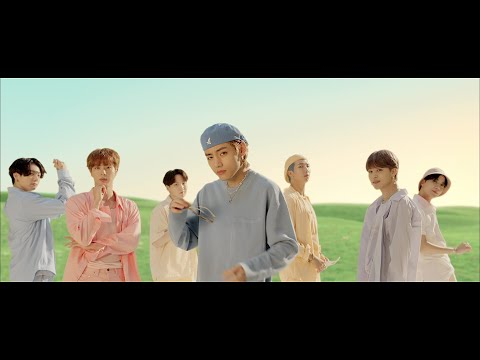

In [42]:
# Playing the highest trended music video in the MonYear = 082020 during pandemic and currently its view count is 1.5 Billion.

from IPython.display import YouTubeVideo

YouTubeVideo('gdZLi9oWNZg', width=800, height=300)